In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
netflix_data=pd.read_csv(r"C:\Users\SK MIANUR RAHAMAN\Downloads\netflix_titles.csv")

In [10]:
netflix_data.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [11]:
netflix_data.shape


(6234, 12)

In [12]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      6234 non-null   object
 4   cast          6234 non-null   object
 5   country       6234 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6234 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [13]:
netflix_data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      11
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [14]:
null_col=["director","cast","country","data_added","rating"]

In [15]:
netflix_data.duplicated().sum()

np.int64(0)

In [16]:
netflix_data.count()

show_id         6234
type            6234
title           6234
director        6234
cast            6234
country         6234
date_added      6223
release_year    6234
rating          6234
duration        6234
listed_in       6234
description     6234
dtype: int64

In [17]:
netflix_data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [18]:
netflix_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [19]:
(netflix_data.isnull().sum()/netflix_data.shape[0])*100



show_id         0.000000
type            0.000000
title           0.000000
director        0.000000
cast            0.000000
country         0.000000
date_added      0.176452
release_year    0.000000
rating          0.000000
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

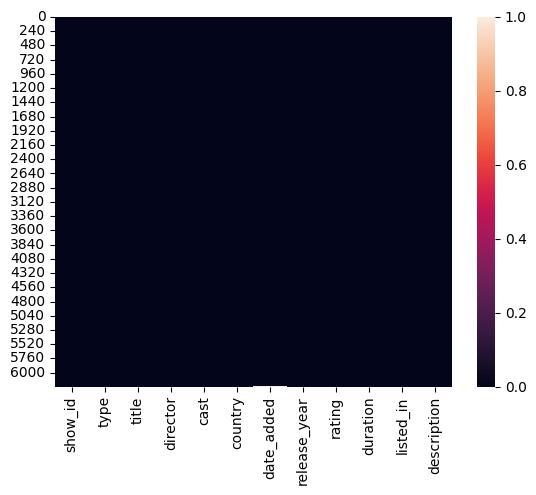

In [20]:
sns.heatmap(netflix_data.isnull())
plt.show()

In [21]:
for col in null_col:
    netflix_data.fillna({col:"Unknown"},inplace=True)
netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [22]:
tv_show=netflix_data[netflix_data['type']=="TV Show"]
movie=netflix_data[netflix_data['type']=="Movie"]

In [23]:
movie.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [24]:
tv_show.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,Unknown,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...


In [25]:
oldest_movie=movie[movie['release_year']==movie['release_year'].min()]
oldest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2011,60027945,Movie,Prelude to War,Frank Capra,Unknown,United States,"March 31, 2017",1942,TV-PG,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
2013,60027942,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-G,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...


In [26]:
oldest_tvshow=tv_show[tv_show['release_year']==tv_show['release_year'].min()]
oldest_tvshow

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4292,81030762,TV Show,Pioneers: First Women Filmmakers*,Unknown,Unknown,Unknown,"December 30, 2018",1925,TV-PG,1 Season,TV Shows,This collection restores films from women who ...


In [27]:
len(netflix_data['listed_in'].unique())

461

In [28]:
genre=netflix_data['listed_in'].str.split(', ').explode().value_counts()
top_5_genre=genre.head(5)
top_5_genre

listed_in
International Movies      1927
Dramas                    1623
Comedies                  1113
International TV Shows    1001
Documentaries              668
Name: count, dtype: int64

In [29]:
netflix_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [30]:
comedy_movies=netflix_data[netflix_data['listed_in']=='Comedies']
comedy_movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
141,80059432,Movie,SMOSH: The Movie,Alex Winter,"Ian Hecox, Anthony Padilla, Jenna Marbles, Gra...",United States,"September 22, 2015",2015,PG-13,83 min,Comedies,To keep his teen crush from spotting him in an...
154,80243600,Movie,Between Two Ferns: The Movie,Scott Aukerman,"Zach Galifianakis, Lauren Lapkus, Ryan Gaul, J...",United States,"September 20, 2019",2019,TV-MA,83 min,Comedies,Armed with awkward questions and zero self-awa...


In [31]:
cast_count=netflix_data['cast'].str.split(', ').explode().value_counts()
top_5_cast=cast_count.head(5)
top_5_cast

cast
Unknown             570
Anupam Kher          33
Shah Rukh Khan       30
Om Puri              27
Naseeruddin Shah     27
Name: count, dtype: int64

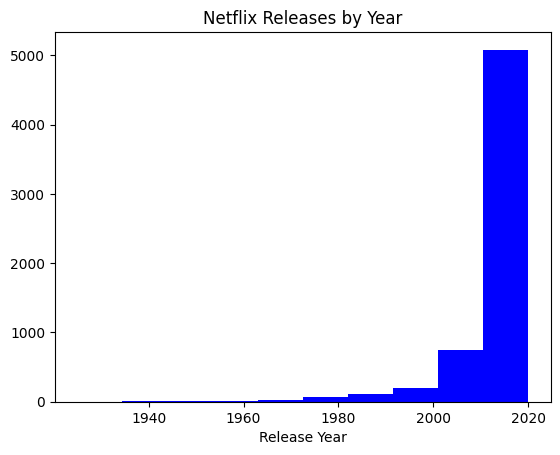

In [32]:
plt.hist(netflix_data['release_year'],color='b')
plt.xlabel("Release Year")
plt.title('Netflix Releases by Year')
plt.show()

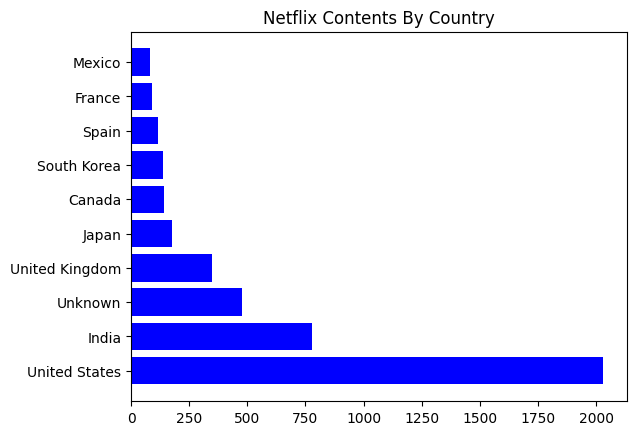

In [33]:
country_count=netflix_data['country'].value_counts().head(10)
plt.barh(country_count.index,country_count.values,color='b')
plt.title("Netflix Contents By Country")
plt.show()

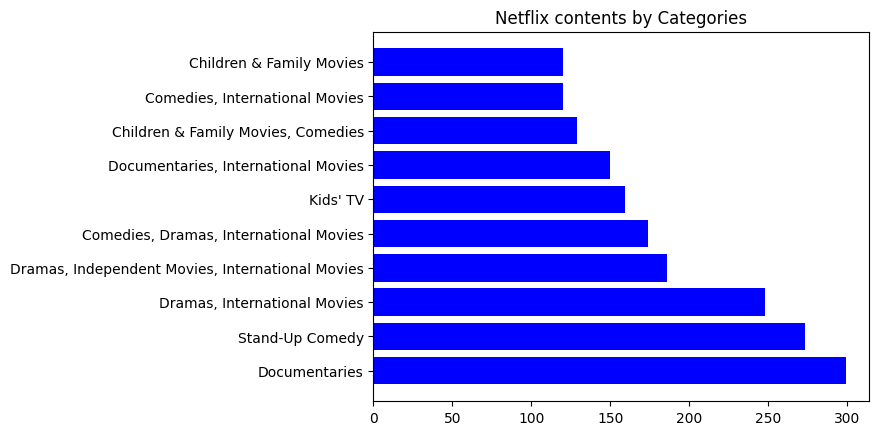

In [34]:
listed_count=netflix_data["listed_in"].value_counts().head(10)
plt.barh(listed_count.index,listed_count.values,color="b")
plt.title("Netflix contents by Categories")
plt.show()

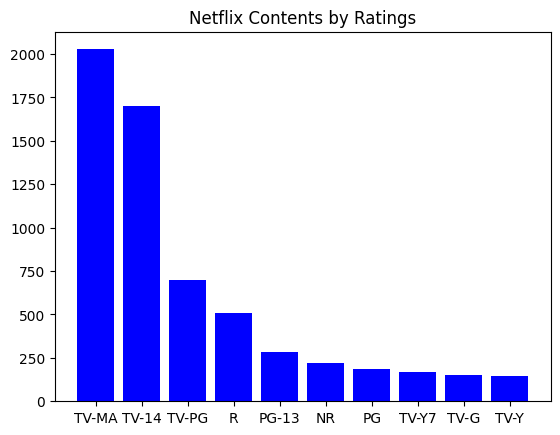

In [35]:
rating_count=netflix_data["rating"].value_counts().head(10)
plt.bar(rating_count.index,rating_count.values,color="b")
plt.title("Netflix Contents by Ratings");
plt.show()

In [36]:
netflix_data.to_csv(r"C:\Users\SK MIANUR RAHAMAN\Downloads\netflix_titles.csv",index=False)

In [37]:
netflix_data[netflix_data['director'].isnull()]['type'].value_counts()


Series([], Name: count, dtype: int64)